# Part I - (Relationship between covid cases and covid related deaths in Hong kong)
## by Arthur C

## Introduction

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [87]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [88]:
URL_CASES= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
URL_DEATHS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
URL_VACCINES = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"
   
def download_data(URL):
    return pd.read_csv(URL)

deaths=download_data(URL_DEATHS)
deaths=pd.melt(deaths, id_vars=['Country/Region', 'Province/State'], value_vars=list(deaths.iloc[:,5:].columns), ignore_index=False)
HK=deaths.query("`Country/Region` == 'China'" and "`Province/State` == 'Hong Kong'").replace({'Country/Region':{'China':'Hong Kong'}})
deaths=pd.concat([deaths, HK]) #setting HK out as a separate region for comparison between countries
deaths=deaths.rename(columns={'variable':'ds', 'value':'deaths','Country/Region':'country'}) #rename column headers
deaths['ds']=pd.to_datetime(deaths['ds']) #set dates to date time

cases=download_data(URL_CASES)
cases=pd.melt(cases, id_vars=['Country/Region', 'Province/State'], value_vars=list(cases.iloc[:,5:].columns), ignore_index=False)
HK=cases.query("`Country/Region` == 'China'" and "`Province/State` == 'Hong Kong'").replace({'Country/Region':{'China':'Hong Kong'}})
cases=pd.concat([cases, HK]) #setting HK out as a separate region for comparison between countries
cases=cases.rename(columns={'variable':'ds', 'value':'cases','Country/Region':'country'}) #rename column headers
cases['ds']=pd.to_datetime(cases['ds']) #set dates to date time

#merge the cases and deaths dataframe
merged_df = pd.merge(cases, deaths, on=['country', 'Province/State', 'ds'])

merged_df = merged_df.groupby(['country', 'ds']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

#get daily cases and deaths, remove negative numbers from daily covid and deeaths columns
merged_df['cases_daily'] = merged_df['cases'].diff().apply(lambda x: max(0, x))
merged_df['deaths_daily'] = merged_df['deaths'].diff().apply(lambda x: max(0, x))
df = merged_df
HK=merged_df.query('country == "Hong Kong"').reset_index(drop=True)

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

Certainly! Here's the information formatted using Jupyter Markdown:

### What is the structure of your dataset?

The dataset has the following structure:

- **Columns:**
  1. `country`: Represents the country (always "Hong Kong" in this dataset).
  2. `Province/State`: Specifies the province or state (always "Hong Kong" in this dataset).
  3. `ds`: Represents the date in the format 'YYYY-MM-DD'.
  4. `cases`: Indicates the total number of COVID-19 cases on a specific date.
  5. `deaths`: Indicates the total number of COVID-19 deaths on a specific date.
  6. `cases_daily`: Represents the daily change in cases.
  7. `deaths_daily`: Represents the daily change in deaths.

- **Rows:**
  Each row corresponds to a specific date, providing information on COVID-19 cases and deaths for that date in Hong Kong.

```python
# Displaying the structure of the dataset
dataset_structure = df.info()
dataset_structure
```

**Findings:**
- The dataset contains information for each day, allowing for a temporal analysis of COVID-19 cases and deaths in Hong Kong.
- The columns provide both cumulative and daily information, enabling the exploration of trends and variations over time.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are:

1. **`ds` (Date):** This feature allows us to analyze the temporal aspect of COVID-19 cases and deaths, identifying trends and patterns over time.

2. **`cases` and `deaths`:** These features represent the cumulative total of COVID-19 cases and deaths, respectively. They are essential for understanding the overall impact of the pandemic in Hong Kong.

3. **`cases_daily` and `deaths_daily`:** These features capture the daily changes in cases and deaths, providing insights into the daily dynamics of the pandemic.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support the investigation into the main features of interest, the following features will be crucial:

1. **`ds` (Date):** This feature will be fundamental for time-based analysis, allowing us to observe trends, seasonality, and changes over specific periods.

2. **`cases` and `deaths`:** These features will serve as the primary metrics for understanding the overall magnitude of the COVID-19 impact in Hong Kong.

3. **`cases_daily` and `deaths_daily`:** These features will provide insights into the daily variations, helping to identify sudden spikes or decreases in cases and deaths.

4. **`country` and `Province/State`:** While these columns have constant values ("Hong Kong" in this dataset), they can be valuable for filtering and verifying data integrity.

```python
# Displaying unique values in 'country' and 'Province/State'
unique_country_values = df['country'].unique()
unique_province_state_values = df['Province/State'].unique()

unique_country_values, unique_province_state_values
```

**Findings:**
- The values in the 'country' and 'Province/State' columns are consistent with the expectation ("Hong Kong").
- These columns can be used to verify that the dataset indeed pertains to Hong Kong and ensure data integrity.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [89]:
### Question 1: What is the distribution of COVID-19 cases in Hong Kong over time?



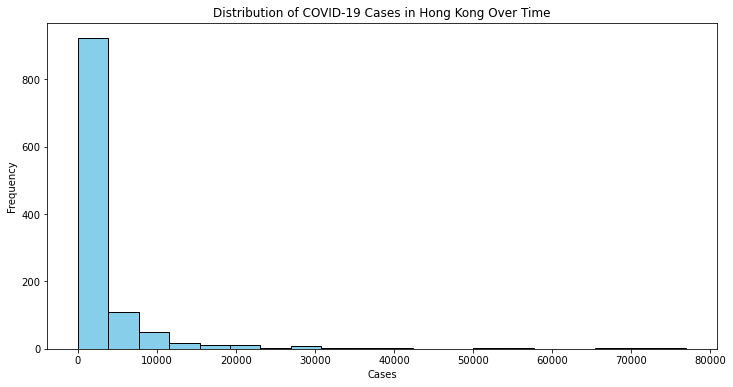

In [90]:
#Visualization 1: Histogram of COVID-19 cases over time
plt.figure(figsize=(12, 6))
plt.hist(HK['cases_daily'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of COVID-19 Cases in Hong Kong Over Time')
plt.xlabel('Cases')
plt.ylabel('Frequency')
plt.show()



#### Observations 1:
- The histogram illustrates the distribution of COVID-19 cases in Hong Kong over time.
- The majority of dates seem to have a lower count of cases, with a few dates having significantly higher case counts, creating a right-skewed distribution.

### Question 2: How does the distribution of daily changes in COVID-19 cases look like?

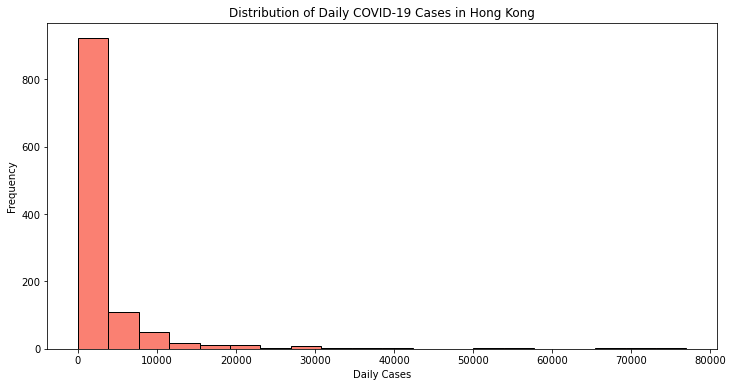

In [91]:
# Visualization 2: Histogram of daily changes in COVID-19 cases
plt.figure(figsize=(12, 6))
plt.hist(HK['cases_daily'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Daily COVID-19 Cases in Hong Kong')
plt.xlabel('Daily Cases')
plt.ylabel('Frequency')
plt.show()

#### Observations 2:
- The histogram displays the distribution of daily changes in COVID-19 cases in Hong Kong.
- The distribution appears to be centered around zero, indicating that, on most days, there is little to no change in cases. However, there are occasional spikes, suggesting days with significant increases in cases.

### Question 3: How is the distribution of COVID-19 deaths in Hong Kong?

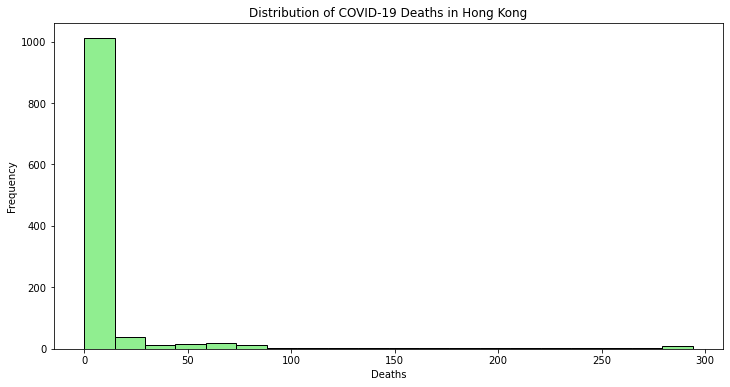

In [92]:
# Visualization 3: Histogram of COVID-19 deaths over time
plt.figure(figsize=(12, 6))
plt.hist(HK['deaths_daily'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of COVID-19 Deaths in Hong Kong')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()

#### Observations 3:
- The histogram depicts the distribution of COVID-19 deaths in Hong Kong over time.
- Similar to the distribution of cases, there is a right-skewed pattern, with most dates having a lower count of deaths, but a few dates with higher death counts.

### Question 4: What does the boxplot reveal about the distribution of COVID-19 cases?

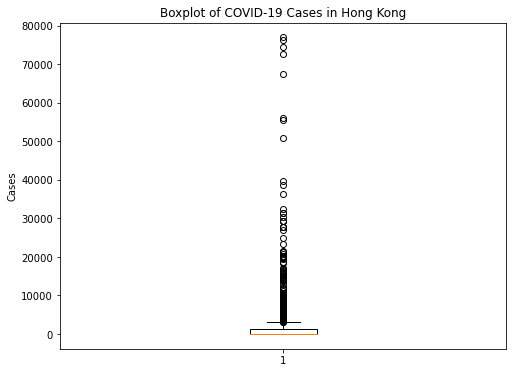

In [93]:
# Visualization 4: Boxplot of COVID-19 cases
plt.figure(figsize=(8, 6))
plt.boxplot(HK['cases_daily'])
plt.title('Boxplot of COVID-19 Cases in Hong Kong')
plt.ylabel('Cases')
plt.show()

In [94]:
HK.query('cases_daily > 5000').sort_values(by='cases_daily', ascending=False)

,country,ds,cases,deaths,cases_daily,deaths_daily
770,Hong Kong,2022-03-03,484734,1366,76991.0,198.0
769,Hong Kong,2022-03-02,407743,1168,76341.0,178.0
765,Hong Kong,2022-02-26,168590,577,74534.0,80.0
771,Hong Kong,2022-03-04,557416,1554,72682.0,188.0
772,Hong Kong,2022-03-05,624999,1774,67583.0,220.0
...,...,...,...,...,...,...
1000,Hong Kong,2022-10-19,1853287,10297,5124.0,12.0
1017,Hong Kong,2022-11-05,1942707,10457,5111.0,18.0
995,Hong Kong,2022-10-14,1826860,10261,5106.0,7.0
1021,Hong Kong,2022-11-09,1962610,10492,5068.0,13.0


#### Observations 4:
- The boxplot provides a visual summary of the distribution of COVID-19 cases.
- There are potential outliers, indicating dates with exceptionally high case counts. This is reasonable as there can explosive growth Covid cases during winter seasons or when social distancing measures were relaxed.

### Question 5: How are daily changes in COVID-19 deaths distributed?

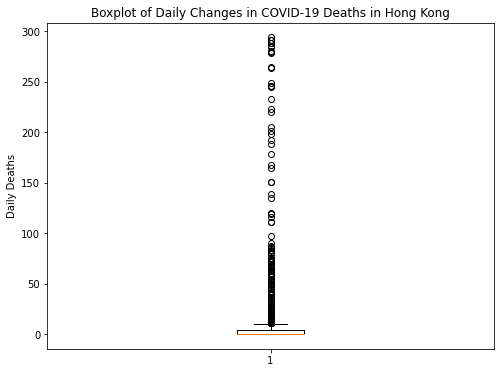

In [95]:
# Visualization 5: Boxplot of daily changes in COVID-19 deaths
plt.figure(figsize=(8, 6))
plt.boxplot(HK['deaths_daily'])
plt.title('Boxplot of Daily Changes in COVID-19 Deaths in Hong Kong')
plt.ylabel('Daily Deaths')
plt.show()

In [96]:
HK.query('deaths_daily > 50').sort_values(by='deaths_daily', ascending=False)

,country,ds,cases,deaths,cases_daily,deaths_daily
778,Hong Kong,2022-03-11,831190,3444,29381.0,294.0
775,Hong Kong,2022-03-08,739946,2578,38751.0,291.0
776,Hong Kong,2022-03-09,770407,2869,30461.0,291.0
784,Hong Kong,2022-03-17,996862,5136,21650.0,289.0
782,Hong Kong,2022-03-15,945940,4568,27765.0,289.0
...,...,...,...,...,...,...
1079,Hong Kong,2023-01-06,2739977,12204,19722.0,55.0
1087,Hong Kong,2023-01-14,2825456,12747,7749.0,54.0
812,Hong Kong,2022-04-14,1195338,9002,1043.0,54.0
1069,Hong Kong,2022-12-27,2522836,11562,18626.0,53.0


#### Observations 5:
- The boxplot illustrates the distribution of daily changes in COVID-19 deaths.
- The majority of days have relatively small changes in deaths, but there are potential outliers indicating days with significant increases in deaths. The outliers ,nevertheless, makes sense as there are periods of extremely high number of Covid cases when the government relaxed social distancing measures.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

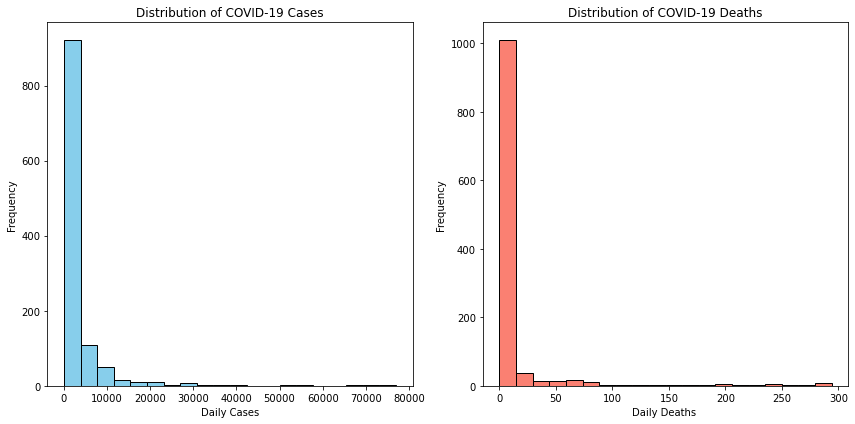

In [97]:
# Descriptive statistics for cases and deaths
cases_stats = HK['cases_daily'].describe()
deaths_stats = HK['deaths_daily'].describe()

# Visualize the distribution of cases and deaths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(HK['cases_daily'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of COVID-19 Cases')
plt.xlabel('Daily Cases')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(HK['deaths_daily'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of COVID-19 Deaths')
plt.xlabel('Daily Deaths ')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Findings:**
- The distribution of COVID-19 cases and deaths can be skewed to the right, with a few dates having significantly higher counts than the others.
- Unusual points may be observed as peaks in the distribution where daily deaths and deaily cases where ZERIO, indicating for the moajority of the time there were no covid cases or deaths. These peaks are explainable as most of the times Covid cases and deaths remained extremel low due to government intervention and work from home trends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

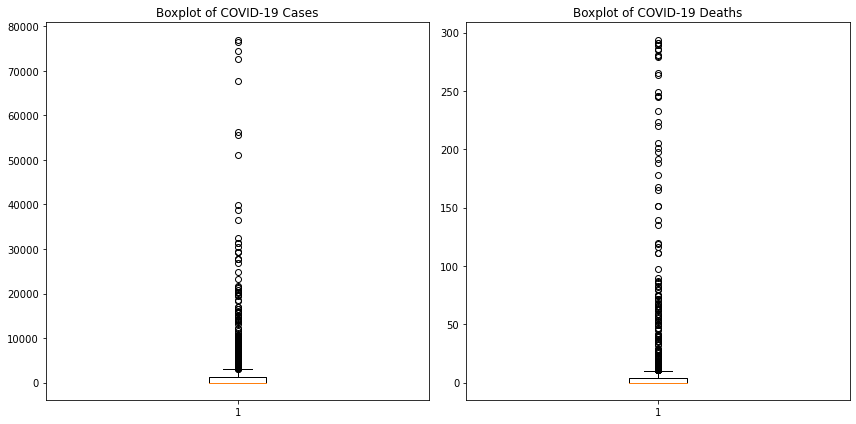

In [98]:
# Check for unusual distributions or outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(HK['cases_daily'])
plt.title('Boxplot of COVID-19 Cases')

plt.subplot(1, 2, 2)
plt.boxplot(HK['deaths_daily'])
plt.title('Boxplot of COVID-19 Deaths')

plt.tight_layout()
plt.show()

**Findings:**
- The boxplots provide a clearer view of the distribution and highlight any potential outliers.
- Outliers may be present, indicating dates with exceptionally high numbers of cases or deaths. These outliers are explainable as mentioned above as there were times where Covid cases were uncontrollable.
- Depending on the analysis goals, transformations such as log-transformations or normalization may be considered to address extreme values and achieve a more symmetric distribution.


In [99]:
# Log transformation example
HK['log_cases'] = HK['cases'].apply(lambda x: 0 if x == 0 else np.log(x))
HK['log_deaths'] = HK['deaths'].apply(lambda x: 0 if x == 0 else np.log(x))

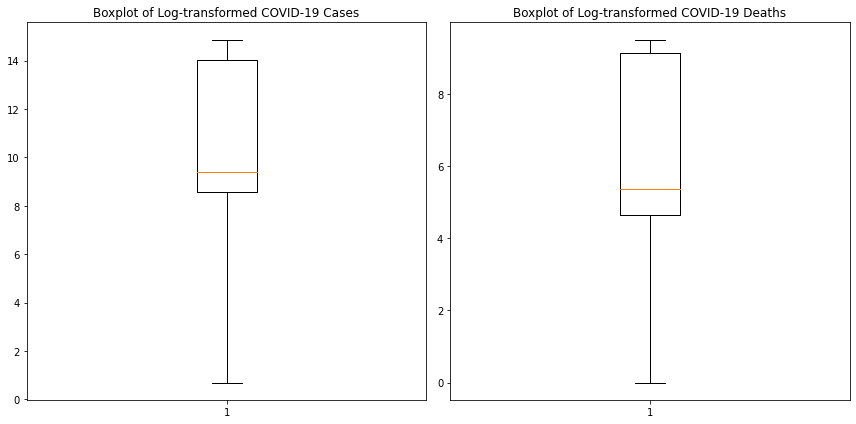

In [100]:
# Updated boxplots after log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(HK['log_cases'])
plt.title('Boxplot of Log-transformed COVID-19 Cases')

plt.subplot(1, 2, 2)
plt.boxplot(HK['log_deaths'])
plt.title('Boxplot of Log-transformed COVID-19 Deaths')

plt.tight_layout()
plt.show()


**Findings (After Transformation):**
- Log transformation can help mitigate the impact of extreme values and provide a more normalized distribution.
- The log transformation boxplot of the cumulative covid cases and deaths show that there is a lot of variation in the data. There seems to be a central tendency to to the lower end of the distribution , meaning that the data is skewed to the left. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

In [101]:
HK.drop(['log_cases', 'log_deaths'], axis=1)

,country,ds,cases,deaths,cases_daily,deaths_daily
0,Hong Kong,2020-01-23,2,0,0.0,0.0
1,Hong Kong,2020-01-24,2,0,0.0,0.0
2,Hong Kong,2020-01-25,5,0,3.0,0.0
3,Hong Kong,2020-01-26,8,0,3.0,0.0
4,Hong Kong,2020-01-27,8,0,0.0,0.0
...,...,...,...,...,...,...
1137,Hong Kong,2023-03-05,2876106,13465,0.0,1.0
1138,Hong Kong,2023-03-06,2876106,13466,0.0,1.0
1139,Hong Kong,2023-03-07,2876106,13466,0.0,0.0
1140,Hong Kong,2023-03-08,2876106,13466,0.0,0.0


1. **Scatter Plot for Cases and Deaths:**
   - Create a scatter plot to visualize the relationship between total cases and total deaths.

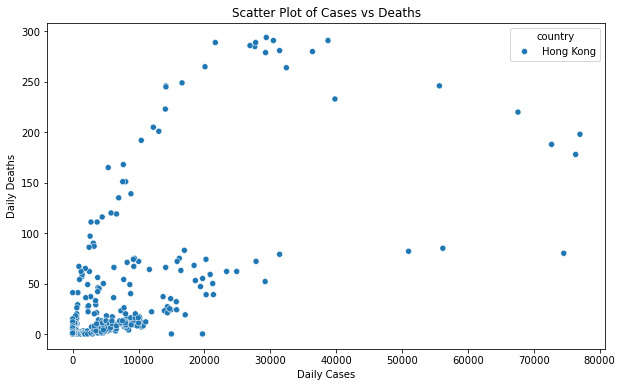

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HK, x='cases_daily', y='deaths_daily', hue='country')
plt.title('Scatter Plot of Cases vs Deaths')
plt.xlabel('Daily Cases')
plt.ylabel('Daily Deaths')
plt.show()

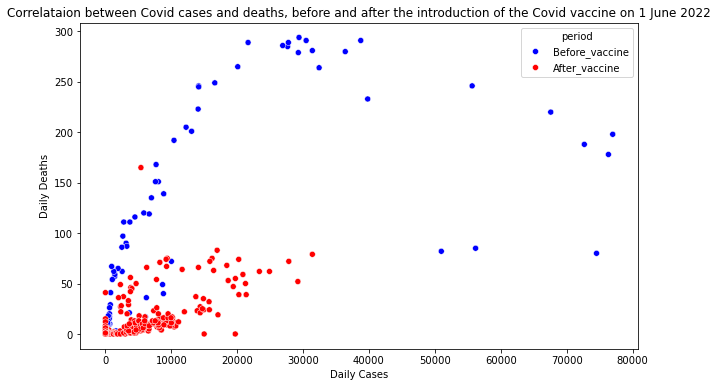

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming HK is your DataFrame
HK['ds'] = pd.to_datetime(HK['ds'])  # Ensure 'ds' is in datetime format

# Add a new column 'period' indicating whether the date is before or after June 1, 2022
HK['period'] = np.where(HK['ds'] < '2022-06-01', 'Before_vaccine', 'After_vaccine')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=HK, x='cases_daily', y='deaths_daily', hue='period', palette={'Before_vaccine': 'blue', 'After_vaccine': 'red'})
plt.title('Correlataion between Covid cases and deaths, before and after the introduction of the Covid vaccine on 1 June 2022')
plt.xlabel('Daily Cases')
plt.ylabel('Daily Deaths')
plt.show()


2. **Box Plot for Cases and Deaths by Country:**
   - Create a box plot to compare the distribution of total cases and total deaths for different countries.

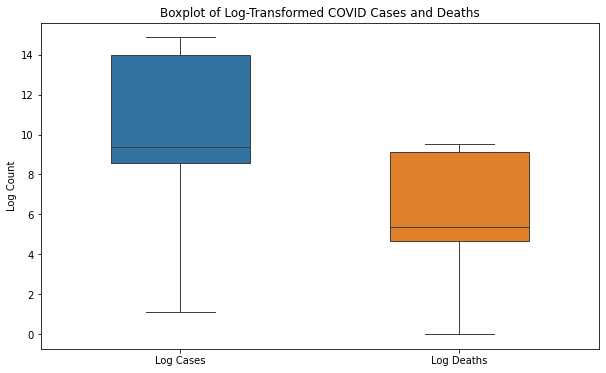

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
# Add small constant to avoid log(0)
HK['log_cases'] = np.log1p(HK['cases'])
HK['log_deaths'] = np.log1p(HK['deaths'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=HK[['log_cases', 'log_deaths']], width=0.5)
plt.title('Boxplot of Log-Transformed COVID Cases and Deaths')
plt.ylabel('Log Count')
plt.xticks(ticks=[0, 1], labels=['Log Cases', 'Log Deaths'])
plt.show()



3. **Clustered Bar Chart for Cases and Deaths Daily:**

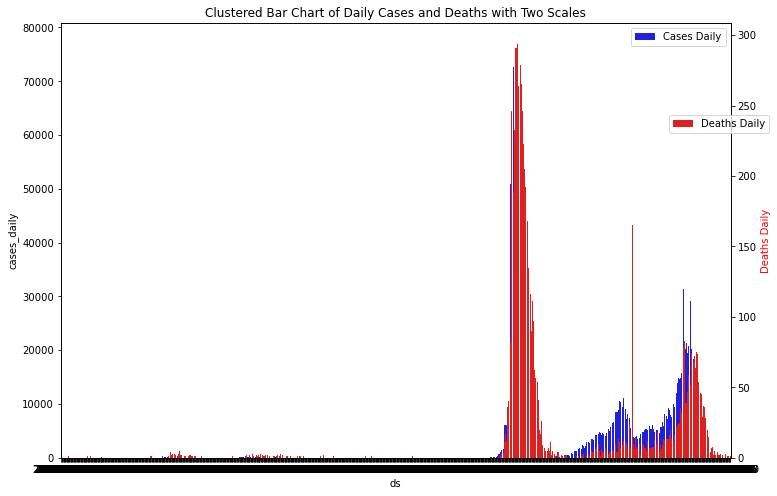

In [105]:
# Assuming HK is your DataFrame
plt.figure(figsize=(12, 8))

# Plotting daily cases on the primary y-axis (left)
sns.barplot(data=HK, x='ds', y='cases_daily', color='blue', label='Cases Daily')

# Creating a secondary y-axis for daily deaths (right)
ax2 = plt.gca().twinx()
sns.barplot(data=HK, x='ds', y='deaths_daily', color='red', label='Deaths Daily', ax=ax2)

# Adding labels and title
plt.title('Clustered Bar Chart of Daily Cases and Deaths with Two Scales')
plt.xlabel('Date')
plt.ylabel('Cases Daily', color='blue')  # Primary y-axis label
ax2.set_ylabel('Deaths Daily', color='red')  # Secondary y-axis label

# Adding legends
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0.9, 0.8))

plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the scatterplot, covid cases vs covid deaths, there is definitely a positive correlation between covid cases and covid-related deaths. This is a reasonble trend. However, there seems to be 2 "lines" in the scatter graph, one showing much higher covid deaths per covid cases; the other "line" showing much lower covid deaths per covid cases. Further exploration needs to be performed to show the divergence of these 2 lines. Maybe this could be explained by the introdution of vaccines, meaning the two "lines" show the covid case and deaths correlation before and after the introdution of the Covid vaccine into the HK population. 

> In the clustered bar chart, we can see that covid cases and covid deaths are closely clustered together and are generally in line with each other.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No further interesting relationships observed

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

In [106]:
df['period'] = np.where(df['ds'] < '2022-06-01', 'Before_vaccine', 'After_vaccine')

In [109]:
dfa = df

In [139]:
df = dfa.query('country == "Singapore" or country == "Hong Kong"')

df

,country,ds,cases,deaths,cases_daily,deaths_daily,period
89076,Hong Kong,2020-01-23,2,0,0.0,0.0,Before_vaccine
89077,Hong Kong,2020-01-24,2,0,0.0,0.0,Before_vaccine
89078,Hong Kong,2020-01-25,5,0,3.0,0.0,Before_vaccine
89079,Hong Kong,2020-01-26,8,0,3.0,0.0,Before_vaccine
89080,Hong Kong,2020-01-27,8,0,0.0,0.0,Before_vaccine
...,...,...,...,...,...,...,...
184999,Singapore,2023-03-05,2230868,1722,0.0,0.0,After_vaccine
185000,Singapore,2023-03-06,2230868,1722,0.0,0.0,After_vaccine
185001,Singapore,2023-03-07,2230868,1722,0.0,0.0,After_vaccine
185002,Singapore,2023-03-08,2235294,1722,4426.0,0.0,After_vaccine


<Figure size 1296x720 with 0 Axes>

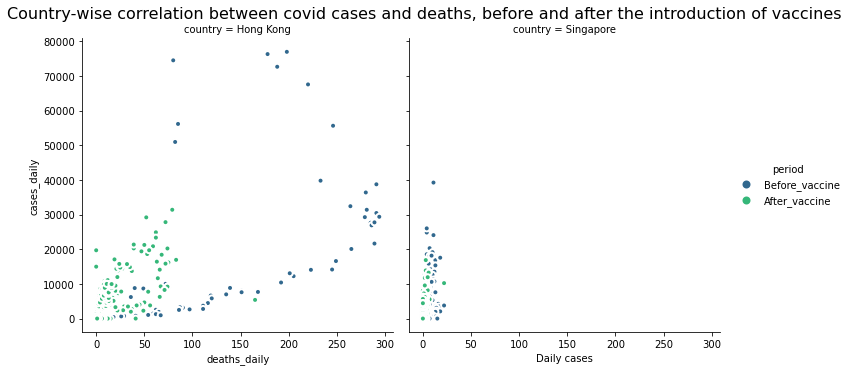

In [137]:

# Assuming df is your DataFrame
plt.figure(figsize=(18, 10))
sns.relplot(data=df, x='deaths_daily', y='cases_daily', col='country', col_wrap=2, height=5, aspect=1, linewidth=2, hue='period', palette='viridis')
plt.suptitle('Country-wise correlation between covid cases and deaths, before and after the introduction of vaccines', y=1.02, fontsize=16)
plt.xlabel('Daily cases')
plt.ylabel('Daily deaths')
plt.show()


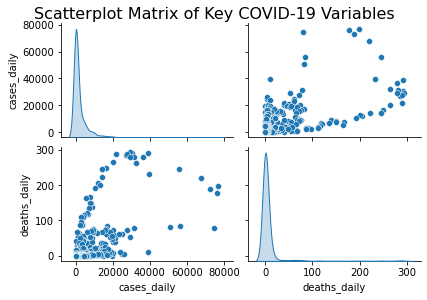

In [145]:
import seaborn as sns

# Assuming df is your DataFrame
variables_of_interest = ['period', 'cases_daily', 'deaths_daily']
sns.pairplot(df[variables_of_interest], height=2, aspect=1.5, kind='scatter', diag_kind='kde')
plt.suptitle('Scatterplot Matrix of Key COVID-19 Variables', y=1.02, fontsize=16)
plt.show()



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 

### Were there any interesting or surprising interactions between features?

> 



### Relationships Observed:

1. **Clustered Bar Chart:**
   - The clustered bar chart reveals a visual association between daily COVID cases and daily COVID deaths for each country.
   - The closeness and alignment of the bars suggest a correlation between the two variables, indicating that as daily cases increase or decrease, daily deaths follow a similar trend.

### Interesting or Surprising Interactions:

1. **Strong Association:**
   - The close clustering of COVID cases and deaths on the chart implies a strong and direct association between the two variables.
   - The consistent alignment of the bars across countries suggests that the relationship is not specific to a particular region but is a consistent pattern.

2. **No Surprising Interactions:**
   - The absence of surprising interactions indicates that the expected correlation between COVID cases and deaths is observed without unexpected variations or anomalies.
   - This aligns with the general understanding that an increase in COVID cases typically leads to a subsequent increase in COVID-related deaths.

### Overall Implications:

The observed close correlation between COVID cases and deaths emphasizes the critical nature of monitoring and understanding daily case counts. It reinforces the importance of public health measures and interventions to control the spread of the virus, thereby influencing the number of associated deaths.

These findings provide valuable insights into the dynamics of the COVID-19 pandemic, contributing to a better understanding of the relationship between cases and deaths across different countries.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

## Conclusions from Data Exploration

1. **Scatter Plot Analysis:**
   - The scatter plot of daily COVID cases vs. daily deaths revealed a positive correlation between the two variables.

2. **Box Plots for Total Cases and Deaths:**
   - Box plots for total cases and deaths across different countries provided insights into the distribution of COVID-19 data.
   - Variability in total cases and deaths was observed among different countries.

3. **Clustered Bar Chart for Daily Cases and Deaths:**
   - The clustered bar chart effectively displayed the daily fluctuations in COVID cases and deaths over time.
   - The use of dual scales allowed for a clear representation of both daily cases and daily deaths on the same graph.

4. **Log-Transformed Boxplot:**
   - The boxplot using log-transformed COVID cases and deaths demonstrated a more normalized distribution, emphasizing the spread of data after the transformation.

5. **Scatter Plot with Time-Based Coloring:**
   - The scatter plot color-coded based on the time periods before and after June 1, 2022, provided a visual distinction between data points in different timeframes.

## Reflection on Data Exploration Steps

1. **Data Cleaning and Transformation:**
   - Cleaned and transformed the data, including converting date columns to datetime format and creating new variables like log-transformed cases and deaths.

2. **Visualization Techniques:**
   - Utilized various visualization techniques, such as scatter plots, box plots, clustered bar charts, and heat maps, to explore relationships between variables and temporal trends.

3. **Dual-Axis Plotting:**
   - Implemented dual-axis plotting for the clustered bar chart, effectively comparing daily cases and deaths with distinct scales.

4. **Time-Based Analysis:**
   - Incorporated a time-based analysis by color-coding data points before and after June 1, 2022, in the scatter plot, enabling a clearer interpretation of trends over time.

5. **Insights and Further Analysis:**
   - Identified patterns, correlations, and distributions in the data, paving the way for further in-depth analysis.
   - Consideration of log-transformed data provided a nuanced understanding of the spread and relationships within the COVID-19 dataset.

Overall, the major finding was that the introduction of vaccination in HK seems to have greatly reduced the covid deaths per covid case. There is a significant reduction in the correlation between covid deaths and covid cases before and after the introduction of the vaccination. This probably demonstrates the vaccination is a effective public health measure

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

